In [1]:
import numpy as np
import time

# Simulated Annealing

Solve the Sudoku problem with Simulated Annealing. You can design your own algorithm or simply refer to [Metaheuristics_can_solve_Sudoku_puzzles](https://www.researchgate.net/publication/220403361_Metaheuristics_can_solve_Sudoku_puzzles). 

The code provided below starts with making a problem instance and ends by visualizing the running process of SA.

In [2]:
# making a problem instance
def make_grid_python(n):
    grid = np.empty((n**2, n**2), int)
    x = 0
    for i in range(n):
        for j in range(n):
            for k in range(n**2):
                grid[n*i+j, k] = x%(n**2) + 1
                x += 1
            x += n
        x += 1
    return grid

def make_grid_numpy(n):
    return np.fromfunction(lambda i, j: (i*n+i//n+j)%(n**2)+1, (n**2, n**2), dtype=int)

# a comparison between native python and numpy
# vary n to see their performances
n = 10
%timeit make_grid_python(n)
%timeit make_grid_numpy(n)

# test
grid = make_grid_numpy(3)
grid

12.9 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
199 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
       [4, 5, 6, 7, 8, 9, 1, 2, 3],
       [7, 8, 9, 1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7, 8, 9, 1],
       [5, 6, 7, 8, 9, 1, 2, 3, 4],
       [8, 9, 1, 2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8, 9, 1, 2],
       [6, 7, 8, 9, 1, 2, 3, 4, 5],
       [9, 1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)

In [5]:
class Sudoku:
    @classmethod
    def create(cls, n, seed=303):
        rng = np.random.default_rng(seed)
        init_grid = make_grid_numpy(n)

        # randomly mask out some cells to create a problem instance
        # cells marked by *1* is given and fixed
        mask = rng.integers(0, 2, size=init_grid.shape)
        grid = init_grid*mask

        return cls(n, mask, grid, seed)

    def __init__(self, n, mask, grid, seed) -> None:
        self.seed = seed
        self.mask = mask
        self.grid = grid
        self.n = n
        self.all = set(range(1, n**2+1))

    def value(self):
        # TODO: evaluate the current state, return a scalar value 
        
        raise NotImplementedError()
    
    def local_search(self):
        # TODO: apply your neighborhood search operator to get the next state
        
        next_state = Sudoku(self.n, self.mask, self.grid, self.seed)

        return next_state


    def init_solution(self):
        rng = np.random.default_rng(self.seed)
        n = self.n
        grid = self.grid.reshape(n, n, n, n).transpose(0, 2, 1, 3)
        for I in np.ndindex(n, n):
            idx = grid[I]==0
            grid[I][idx] = rng.permutation(list(self.all-set(grid[I].flat)))
        return self
        
    def __repr__(self) -> str:
        return self.grid.__repr__()

# test
sudoku = Sudoku.create(3)
sudoku.init_solution()
sudoku, sudoku.value()

(array([[9, 2, 3, 4, 3, 6, 8, 6, 9],
        [4, 5, 1, 7, 8, 9, 1, 2, 3],
        [7, 6, 8, 5, 2, 1, 4, 5, 7],
        [2, 3, 4, 3, 6, 7, 4, 9, 1],
        [5, 6, 7, 9, 1, 5, 5, 3, 8],
        [8, 9, 1, 8, 2, 4, 7, 2, 6],
        [3, 4, 5, 1, 9, 8, 4, 1, 2],
        [6, 7, 8, 7, 2, 4, 3, 6, 5],
        [9, 1, 2, 3, 6, 5, 9, 7, 8]], dtype=int64),
 -33)

In [23]:
def simulated_annealing(initial:Sudoku, schedule, halt, log_interval=200):
    state = initial.init_solution()
    t = 0           # time step
    T = schedule(t) # temperature
    f = [state.value()] # a recording of values
    while not halt(T):
        T = schedule(t)
        new_state = state.local_search()
        new_value = new_state.value()
        # TODO: implement the replacement here
        
        

        # update time and temperature
        if t % log_interval == 0:
            print(f"step {t}: T={T}, current_value={state.value()}")
        t += 1
        T = schedule(t)
    print(f"step {t}: T={T}, current_value={state.value()}")
    return state, f

In [ ]:
import matplotlib.pyplot as plt

# define your own schedule and halt condition
# run the algorithm on different n with different settings
n = 4
solution, record = simulated_annealing(
    initial=Sudoku.create(n), 
    schedule=lambda t: 0.999**t, 
    halt=lambda T: T<1e-7
)
solution, solution.value()

Text(0, 0.5, 'value')

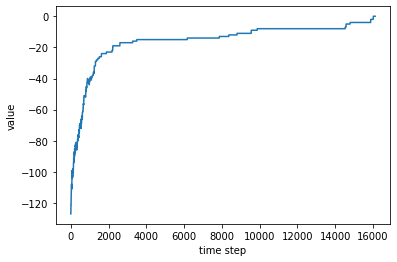

In [27]:
# visualize the curve
plt.plot(record)
plt.xlabel("time step")
plt.ylabel("value")